In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
path = '/home/jupyter-l.fedoseeva-12/prodvin_tems_python/nyc.csv.zip'

In [152]:
nyc = pd.read_csv(path, compression='zip', encoding='ISO-8859-1')

In [153]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [119]:
nyc['pickup_longitude'] = np.radians(nyc['pickup_longitude'])
nyc['pickup_latitude'] = np.radians(nyc['pickup_latitude'])
nyc['dropoff_longitude'] = np.radians(nyc['dropoff_longitude'])
nyc['dropoff_latitude'] = np.radians(nyc['dropoff_latitude'])

In [30]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-1.288826,0.710721,-1.288779,0.710563,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-1.291824,0.710546,-1.291182,0.711780,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-1.291242,0.711418,-1.291391,0.711231,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-1.291319,0.710927,-1.291396,0.711363,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-1.290987,0.711536,-1.290787,0.711811,1


In [88]:
def haversine(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, radius=6371):
    
    lat_sin = np.sin((dropoff_latitude - pickup_latitude) / 2) **2
    lat_cos = np.cos(pickup_latitude) * np.cos(dropoff_latitude)
    long_sin = np.sin((dropoff_longitude - pickup_longitude) / 2) **2
    
    return 2 * radius * np.arcsin(np.sqrt(lat_sin + lat_cos * long_sin))

In [11]:
#latitude1, latitude2, long1, long2 = [0.710721, 0.710563, -0.022494, -1.288779]

In [12]:
#lat_sin = np.sin((latitude2 - latitude1) / 2) **2
#lat_cos = np.cos(latitude2) * np.cos(latitude1)
#long_sin = np.sin((long2 - long1) / 2) **2

In [13]:
#2 * 6371 * np.arcsin(np.sqrt(lat_sin + lat_cos * long_sin))

In [32]:
%%timeit

dists = [ ]
for i, row in nyc.iterrows():
    dists.append(haversine(row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude))
nyc['distance'] = dists

6.24 s ± 317 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-1.288826,0.710721,-1.288779,0.710563,1,0.410442
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-1.291824,0.710546,-1.291182,0.711780,1,4.628504
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-1.291242,0.711418,-1.291391,0.711231,2,1.001022
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-1.291319,0.710927,-1.291396,0.711363,1,0.910440
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-1.290987,0.711536,-1.290787,0.711811,1,1.361021


In [10]:
import timeit

In [11]:
nyc(%timeit)

SyntaxError: invalid syntax (<ipython-input-11-b30e844e2a16>, line 1)

Второй вариант через itertuples

In [12]:
def haversine(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, radius=6371):
    
    lat_sin = np.sin((dropoff_latitude - pickup_latitude) / 2) **2
    lat_cos = np.cos(pickup_latitude) * np.cos(dropoff_latitude)
    long_sin = np.sin((dropoff_longitude - pickup_longitude) / 2) **2
    
    return 2 * radius * np.arcsin(np.sqrt(lat_sin + lat_cos * long_sin))

In [13]:
%%timeit

dists_int = [ ]
for row in nyc.itertuples():
    dists_int.append(haversine(row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude))
nyc['distance_int'] = dists_int

541 ms ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_int
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-1.288826,0.710721,-1.288779,0.710563,1,0.410442,0.410442
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-1.291824,0.710546,-1.291182,0.711780,1,4.628504,4.628504
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-1.291242,0.711418,-1.291391,0.711231,2,1.001022,1.001022
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-1.291319,0.710927,-1.291396,0.711363,1,0.910440,0.910440
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-1.290987,0.711536,-1.290787,0.711811,1,1.361021,1.361021


Третий способ через apply

In [15]:
%%timeit

nyc['distance_apply'] = nyc.apply(lambda x: haversine(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude']), axis=1)

1.41 s ± 84.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_int,distance_apply
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-1.288826,0.710721,-1.288779,0.710563,1,0.410442,0.410442,0.410442
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-1.291824,0.710546,-1.291182,0.711780,1,4.628504,4.628504,4.628504
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-1.291242,0.711418,-1.291391,0.711231,2,1.001022,1.001022,1.001022
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-1.291319,0.710927,-1.291396,0.711363,1,0.910440,0.910440,0.910440
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-1.290987,0.711536,-1.290787,0.711811,1,1.361021,1.361021,1.361021


In [17]:
longest = nyc.distance_apply.max()

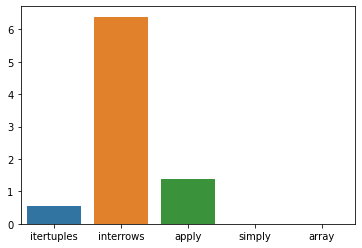

In [41]:
sns.barplot(x=['itertuples', 'interrows', 'apply', 'simply', 'array'], y=[0.549, 6.39, 1.38, 0.00599, 0.00385])

Изменения в коде весьма незначительны: передаем функции на вход необходимые колонки, и получается магия!
df['distance'] = haversine(df['col1'], df['col2'], df['col3'], df['col4'])
Убедимся, что векторизованные операции работают намного быстрее! Создайте функцию для подсчета расстояния 
haversine, описанную в первом степе, и примените её к датасету nyc. Результат сохраните в колонку distance. 

In [21]:
def haversine(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, radius=6371):
    
    lat_sin = np.sin((dropoff_latitude - pickup_latitude) / 2) **2
    lat_cos = np.cos(pickup_latitude) * np.cos(dropoff_latitude)
    long_sin = np.sin((dropoff_longitude - pickup_longitude) / 2) **2
    
    return 2 * radius * np.arcsin(np.sqrt(lat_sin + lat_cos * long_sin))

In [22]:
nyc['distance'] =  haversine(nyc['pickup_longitude'], nyc['pickup_latitude'], 
                             nyc['dropoff_longitude'], nyc['dropoff_latitude'])

In [23]:
nyc.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_int,distance_apply
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-1.288826,0.710721,-1.288779,0.710563,1,0.410442,0.410442,0.410442
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-1.291824,0.710546,-1.291182,0.711780,1,4.628504,4.628504,4.628504
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-1.291242,0.711418,-1.291391,0.711231,2,1.001022,1.001022,1.001022
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-1.291319,0.710927,-1.291396,0.711363,1,0.910440,0.910440,0.910440
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-1.290987,0.711536,-1.290787,0.711811,1,1.361021,1.361021,1.361021
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-1.291560,0.710901,-1.291071,0.711365,1,3.226363,3.226363,3.226363
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-1.291195,0.711251,-1.291086,0.711481,1,0.799329,0.799329,0.799329
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-1.290694,0.711643,-1.291371,0.711240,1,4.371676,4.371676,4.371676
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-1.291656,0.710815,-1.291423,0.710901,1,1.495838,1.495838,1.495838
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-1.291206,0.710940,-1.291396,0.711364,2,1.420632,1.420632,1.420632


In [77]:
nyc['disctance2'] = haversine(nyc['pickup_longitude'], nyc['pickup_latitude'], 
                             nyc['dropoff_longitude'], nyc['dropoff_latitude'])

In [78]:
nyc.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,disctance2
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-1.288826,0.710721,-1.288779,0.710563,1,0.410442
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-1.291824,0.710546,-1.291182,0.711780,1,4.628504
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-1.291242,0.711418,-1.291391,0.711231,2,1.001022
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-1.291319,0.710927,-1.291396,0.711363,1,0.910440
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-1.290987,0.711536,-1.290787,0.711811,1,1.361021
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-1.291560,0.710901,-1.291071,0.711365,1,3.226363
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-1.291195,0.711251,-1.291086,0.711481,1,0.799329
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-1.290694,0.711643,-1.291371,0.711240,1,4.371676
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-1.291656,0.710815,-1.291423,0.710901,1,1.495838
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-1.291206,0.710940,-1.291396,0.711364,2,1.420632


In [36]:
%%timeit

nyc['distance2'] = haversine(nyc['pickup_longitude'], nyc['pickup_latitude'], 
                             nyc['dropoff_longitude'], nyc['dropoff_latitude'])

5.99 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


В предыдущем степе мы передавали функции колонки формата Series, с чем связаны дополнительные вычислительные затраты, например, индексирование и проверка типа данных. Чтобы этого избежать, в качестве аргументов функции можно передать всё те же необходимые колонки, дополнительно указав .values, чтобы из Series получить массив NumPy (numpy array). В таком случае действия будут выполняться непосредственно над ndarrays. Такой способ можно использовать, когда отсутствие индексов и пр. не приведет к нарушению работы применяемой функции. 

In [ ]:
nyc['pickup_longitude'] = np.radians(nyc['pickup_longitude'])
nyc['pickup_latitude'] = np.radians(nyc['pickup_latitude'])
nyc['dropoff_longitude'] = np.radians(nyc['dropoff_longitude'])
nyc['dropoff_latitude'] = np.radians(nyc['dropoff_latitude'])

In [80]:
def haversine(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, radius=6371):
    
    lat_sin = np.sin((dropoff_latitude - pickup_latitude) / 2) **2
    lat_cos = np.cos(pickup_latitude) * np.cos(dropoff_latitude)
    long_sin = np.sin((dropoff_longitude - pickup_longitude) / 2) **2
    
    return 2 * radius * np.arcsin(np.sqrt(lat_sin + lat_cos * long_sin))

In [120]:
nyc['distance3'] =  haversine(nyc['pickup_longitude'].values, nyc['pickup_latitude'].values, 
                             nyc['dropoff_longitude'].values, nyc['dropoff_latitude'].values)

In [40]:
%%timeit

nyc['distance3'] =  haversine(nyc['pickup_longitude'].values, nyc['pickup_latitude'].values, 
                             nyc['dropoff_longitude'].values, nyc['dropoff_latitude'].values)

3.85 ms ± 75.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Как вы уже заметили, произошло что-то странное: в качестве широты и долготы стоят нулевые значения, а расстояние — целых 8667 км! Неужели наш пассажир действительно уехал так далеко?
Посмотрите, есть ли еще кейсы, где в качестве хотя бы одной из координат пункта назначения стоят нули, и в качестве ответа укажите количество таких случаев.

In [48]:
nyc[['dropoff_longitude', 'dropoff_latitude']].eq(0) \
                .sum(1) \
                .gt(0) \
                .sum()

958

Постройте графики распределения переменных pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, и для каждой переменной выберите только один наиболее подходящий вариант для дальнейшей фильтрации данных (в итоге – 4 галочки).

In [73]:
nyc.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5164290780>,
      dtype=object)

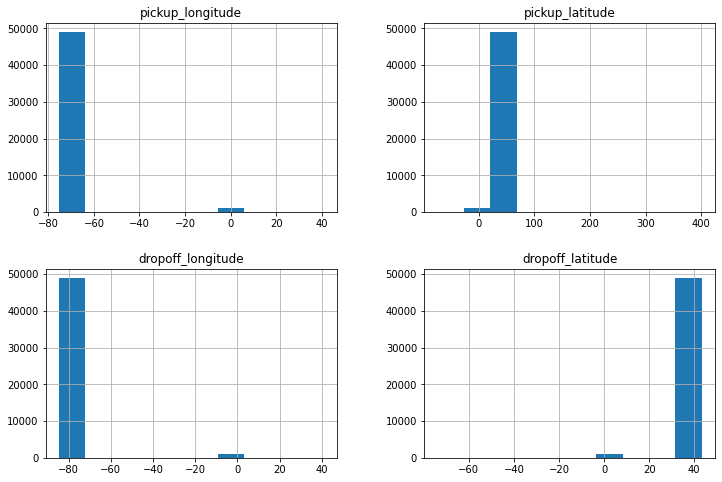

In [74]:
nyc[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].hist(figsize=(12, 8))

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


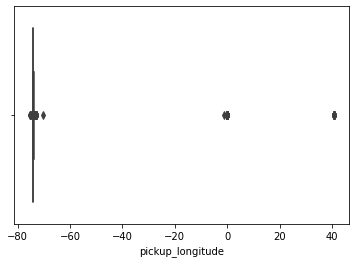

In [75]:
sns.boxplot(nyc.pickup_longitude)

Критерии для фильтрации выбраны, остался последний шаг: отфильтровать имеющиеся данные и наконец-то найти самую дальнюю поездку.
Для фильтрации используйте условия из предыдущего степа, а также добавьте еще одно ограничение для переменной distance. Предположим, максимальная удаленность пунктов друг от друга не должна превышать 50 километров, иначе такой заказ не будет принят системой, а наличие подобных результатов в таблице будет считаться ошибкой.
В качестве ответа укажите сумму, которую заплатил пассажир, проехавший наибольшее расстояние.

In [154]:
nyc.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [155]:
nyc['pickup_longitude_2'] = np.radians(nyc['pickup_longitude'])
nyc['pickup_latitude_2'] = np.radians(nyc['pickup_latitude'])
nyc['dropoff_longitude_2'] = np.radians(nyc['dropoff_longitude'])
nyc['dropoff_latitude_2'] = np.radians(nyc['dropoff_latitude'])

In [156]:
def haversine(pickup_latitude_2, pickup_longitude_2, dropoff_latitude_2, dropoff_longitude_2, radius=6371):
    
    lat_sin = np.sin((dropoff_latitude_2 - pickup_latitude_2) / 2) **2
    lat_cos = np.cos(pickup_latitude_2) * np.cos(dropoff_latitude_2)
    long_sin = np.sin((dropoff_longitude_2 - pickup_longitude_2) / 2) **2
    
    return 2 * radius * np.arcsin(np.sqrt(lat_sin + lat_cos * long_sin))

In [157]:
nyc['distance'] =  haversine(nyc['pickup_longitude_2'].values, nyc['pickup_latitude_2'].values, 
                             nyc['dropoff_longitude_2'].values, nyc['dropoff_latitude_2'].values)

In [163]:
nyc.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_longitude_2,pickup_latitude_2,dropoff_longitude_2,dropoff_latitude_2,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,-1.288826,0.710721,-1.288779,0.710563,0.410442
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,-1.291824,0.710546,-1.291182,0.711780,4.628504
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,-1.291242,0.711418,-1.291391,0.711231,1.001022
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,-1.291319,0.710927,-1.291396,0.711363,0.910440
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,-1.290987,0.711536,-1.290787,0.711811,1.361021
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,-1.291560,0.710901,-1.291071,0.711365,3.226363
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,-1.291195,0.711251,-1.291086,0.711481,0.799329
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1,-1.290694,0.711643,-1.291371,0.711240,4.371676
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1,-1.291656,0.710815,-1.291423,0.710901,1.495838
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2,-1.291206,0.710940,-1.291396,0.711364,1.420632


In [159]:
nyc_filtered = nyc.query('(pickup_longitude < -60) and (pickup_latitude < 120) and (pickup_latitude > 10) and (dropoff_latitude > 10) and (dropoff_longitude < -60)')

In [160]:
nyc_filtered

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_longitude_2,pickup_latitude_2,dropoff_longitude_2,dropoff_latitude_2,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,-1.288826,0.710721,-1.288779,0.710563,0.410442
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,-1.291824,0.710546,-1.291182,0.711780,4.628504
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,-1.291242,0.711418,-1.291391,0.711231,1.001022
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,-1.291319,0.710927,-1.291396,0.711363,0.910440
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,-1.290987,0.711536,-1.290787,0.711811,1.361021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,-1.291543,0.711196,-1.291839,0.710454,2.289172
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,-1.291278,0.711540,-1.291323,0.711407,0.372468
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,-1.291591,0.711037,-1.291511,0.711387,0.798937
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,-1.290602,0.711703,-1.290731,0.711740,0.824089


In [161]:
nn = nyc_filtered.query('distance <= 50')

In [162]:
nn.query('distance == distance.max()')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_longitude_2,pickup_latitude_2,dropoff_longitude_2,dropoff_latitude_2,distance
6308,2010-08-23 11:06:00.000000121,45.0,2010-08-23 11:06:00 UTC,-73.422692,40.747012,-73.870317,40.77316,1,-1.281468,0.71117,-1.28928,0.711626,49.78036


In [138]:
final_nyc.distance.idxmax()

6308

In [ ]:
'(column1 == condition1) & (column2 == condition2)')